# This script contains the following: 
1. Importing libraries and data, renaming columns
2. The elbow technique
3. k-means clustering

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib
from sklearn.preprocessing import StandardScaler

In [2]:
#Allow display of graphs in notebook
%matplotlib inline

In [3]:
path=r'C:\Users\alexl\CareerFoundry\World Happiness Report 2015-2019'

In [4]:
#Import data
df_cluster=pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'df_clean.csv'), index_col=False)

# Data Cleaning

In [5]:
df_cluster.shape

(781, 11)

In [6]:
df_cluster.head()

,Unnamed: 0,Year,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0,2019,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,1,2019,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2,2019,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,3,2019,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,4,2019,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [7]:
df_cluster.tail()

,Unnamed: 0,Year,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
776,777,2015,154,Rwanda,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191
777,778,2015,155,Benin,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010
778,779,2015,156,Syria,3.006,0.66320,0.47489,0.72193,0.15684,0.47179,0.18906
779,780,2015,157,Burundi,2.905,0.01530,0.41587,0.22396,0.11850,0.19727,0.10062
780,781,2015,158,Togo,2.839,0.20868,0.13995,0.28443,0.36453,0.16681,0.10731


In [8]:
#Delete non-numerical columns
df_cluster=df_cluster.drop(columns=['Unnamed: 0', 'Year', 'Country or region'])

In [9]:
df_cluster.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [10]:
#Check for missing values
df_cluster.isnull().sum()
#no missing values

Overall rank                    0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [11]:
df_cluster.rename(columns = {'Overall rank': 'Ranking', 'GDP per capita': 'GDP', 'Healthy life expectancy': 'Life Expectancy', 'Freedom to make life choices':'Freedom', 'Perceptions of corruption':'Corruption'}, inplace=True)

# Standardizing data: Z-Score

In [12]:
#df_clean['GDP']=(df_clean['GDP']-df_clean['GDP'].mean())/df_clean['GDP'].std()

In [13]:
#df_clean['Social support']=(df_clean['Social support']-df_clean['Social support'].mean())/df_clean['Social support'].std()

In [14]:
#df_clean['Life Expectancy']=(df_clean['Life Expectancy']-df_clean['Life Expectancy'].mean())/df_clean['Life Expectancy'].std()

In [15]:
#df_clean['Freedom']=(df_clean['Freedom']-df_clean['Freedom'].mean())/df_clean['Freedom'].std()

In [16]:
#df_clean['Corruption']=(df_clean['Corruption']-df_clean['Corruption'].mean())/df_clean['Corruption'].std()

In [17]:
scaler=StandardScaler()

In [18]:
columns=df_cluster.columns.values.tolist()

In [19]:
columns

['Ranking',
 'Score',
 'GDP',
 'Social support',
 'Life Expectancy',
 'Freedom',
 'Generosity',
 'Corruption']

In [20]:
df_scaled=pd.DataFrame(scaler.fit_transform(df_cluster), columns=columns)
df_scaled.head()

,Ranking,Score,GDP,Social support,Life Expectancy,Freedom,Generosity,Corruption
0,-1.723186,2.123469,1.050155,1.543005,1.504865,1.208973,-0.536463,2.530191
1,-1.701029,1.973427,1.156291,1.500500,1.545139,1.182797,0.272922,2.690950
2,-1.678873,1.932587,1.415458,1.527825,1.674015,1.254781,0.428258,2.038459
3,-1.656716,1.879317,1.148886,1.655341,1.665961,1.176253,1.106833,-0.070314
4,-1.634560,1.873990,1.188378,1.345659,1.557221,0.953759,0.845214,1.631835


# The Elbow Technique

In [21]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [22]:
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\alexl\Documents\anacona\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\alexl\Documents\anacona\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\alexl\Documents\anacona\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\alexl\Documents\anacona\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\alexl\Documents

[-6248.0,
 -3839.4999069933324,
 -2935.106640622858,
 -2589.474792318976,
 -2328.703507022709,
 -2157.9122268267397,
 -2043.3335752275416,
 -1950.3440546724983,
 -1852.8479559602088]

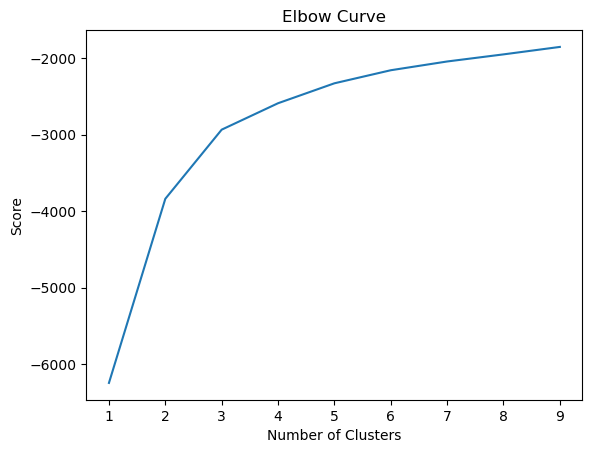

In [23]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Chosing 3 as the optimal cluster number because it seems the most relevant turning point in the chart. While 4 might be a contender, it appears too close to make significant impact, whereas 3 clusters may be more clear.

# K-means clustering

In [24]:
kmeans=KMeans(n_clusters = 3)

In [25]:
#Fit the k-means object to the data
kmeans.fit(df_scaled)

C:\Users\alexl\Documents\anacona\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [26]:
df_scaled['clusters'] = kmeans.fit_predict(df_scaled)

C:\Users\alexl\Documents\anacona\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
df_scaled.head()

,Ranking,Score,GDP,Social support,Life Expectancy,Freedom,Generosity,Corruption,clusters
0,-1.723186,2.123469,1.050155,1.543005,1.504865,1.208973,-0.536463,2.530191,2
1,-1.701029,1.973427,1.156291,1.500500,1.545139,1.182797,0.272922,2.690950,2
2,-1.678873,1.932587,1.415458,1.527825,1.674015,1.254781,0.428258,2.038459,2
3,-1.656716,1.879317,1.148886,1.655341,1.665961,1.176253,1.106833,-0.070314,2
4,-1.634560,1.873990,1.188378,1.345659,1.557221,0.953759,0.845214,1.631835,2


In [28]:
df_scaled['clusters'].value_counts()

0    368
1    277
2    136
Name: clusters, dtype: int64

In [29]:
df_cluster["clusters"]=df_scaled["clusters"].values

In [30]:
df_cluster.head()

,Ranking,Score,GDP,Social support,Life Expectancy,Freedom,Generosity,Corruption,clusters
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2


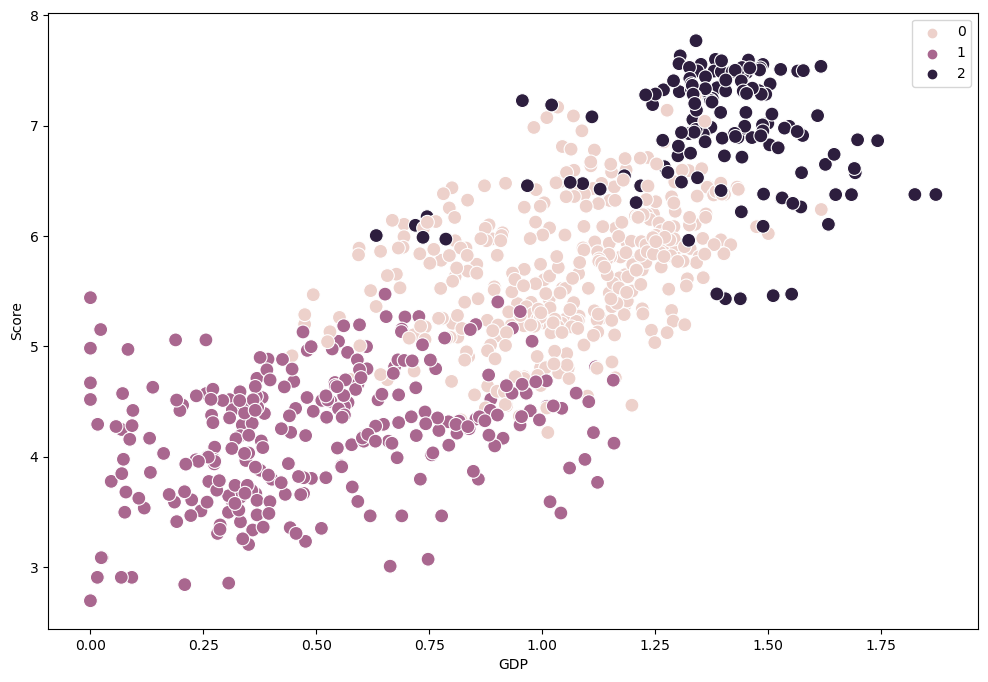

In [31]:
# Plot the clusters for the "Score" and "GDP" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['GDP'], y=df_cluster['Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP') # Label x-axis.
plt.ylabel('Score') # Label y-axis.
plt.show()

In [ ]:
# Plot the clusters for the "Score" and "Life Expectancy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['Life Expectancy'], y=df_cluster['Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Life Expectancy') # Label x-axis.
plt.ylabel('Score') # Label y-axis.
plt.show()

In [ ]:
# Plot the clusters for the "Score" and "Freedom" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['Freedom'], y=df_cluster['Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Freedom') # Label x-axis.
plt.ylabel('Score') # Label y-axis.
plt.show()

In [ ]:
# Plot the clusters for the "Score" and "Social support" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['Social support'], y=df_cluster['Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Social support') # Label x-axis.
plt.ylabel('Score') # Label y-axis.
plt.show()

In [ ]:
# Plot the clusters for the "Score" and "Corruption" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['Corruption'], y=df_cluster['Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Corruption') # Label x-axis.
plt.ylabel('Score') # Label y-axis.
plt.show()

Impressions: 
1) GDP: There seems to be a relatively positive correlation between GDP and Score. And interesting to note that, although not by a drastic amount, the 'happiest' countries, according to this analysis, are the fewest of the cluster groups. 
2) Life Expectancy: While it's true that the countries with the highest life expectancy are rating highest scores, there are a number of 2 cluster countries with dispersed between both ends of the life expectancy analysis with mediocre scores. Regarding the 0 cluster, however, no countries are categorized past 1 on the x axis, attesting to lowest scores of happiness. 
3) Freedom: to me, does not seem to have a dense correlation either way. While there are fewer countries who are considered more free that do rate higher, there appear to be just as many if not more countries who rate freedom similarly who obtain poorer scores. 
4) Social support: the countries who are not offered social support, or less than their counterparts, are not ranked highly. Those who have a social support mark that correlates to 0 or higher, have a better chance at higher ranking. 
5) Corroption: doesn't appear to be a reliable tell of happiness. To begin with, there are more countries with low scores and low corruption than there are with high scores and low corruption, and in fact, those with higher scores seem more dispersed among corruption, though not by a significant amount. 

In [ ]:
#Creating flags for different clusters and creating a column 'cluster'
df_cluster.loc[df_cluster['clusters'] == 4, 'cluster'] = 'black'
df_cluster.loc[df_cluster['clusters'] == 3, 'cluster'] = 'dark purple'
df_cluster.loc[df_cluster['clusters'] == 2, 'cluster'] = 'purple'
df_cluster.loc[df_cluster['clusters'] == 1, 'cluster'] = 'light purple'
df_cluster.loc[df_cluster['clusters'] == 0, 'cluster'] = 'pink'


In [ ]:
#grouping by 'cluster' colors and calculating statistics
df_cluster.groupby('cluster').agg({'GDP':['mean', 'median'], 
                         'Life Expectancy':['mean', 'median'], 
                         'Social support':['mean', 'median'],
                          'Freedom':['mean', 'median'],
                          'Corruption':['mean', 'median']})

Q: Why are all colors not showing? 

In [ ]:
# Plot the clusters for the "GDP" and "Social support" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['GDP'], y=df_cluster['Social support'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP') # Label x-axis.
plt.ylabel('Social support') # Label y-axis.
plt.show()

Mostly, those with higher GDP are also providing more Social support

In [ ]:
# Plot the clusters for the "Corruption" and "Social support" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['Corruption'], y=df_cluster['Social support'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Corruption') # Label x-axis.
plt.ylabel('Social support') # Label y-axis.
plt.show()

Not so conclusive

In [ ]:
# Plot the clusters for the "Freedom" and "Life Expectancy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['Freedom'], y=df_cluster['Life Expectancy'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Freedom') # Label x-axis.
plt.ylabel('Life Expectancy') # Label y-axis.
plt.show()

Not so conclusive

In [ ]:
# Plot the clusters for the "Freedom" and "Corruption" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['Freedom'], y=df_cluster['Corruption'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Freedom') # Label x-axis.
plt.ylabel('Corruption') # Label y-axis.
plt.show()

In [ ]:
# Plot the clusters for the "GDP" and "Life Expectancy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['GDP'], y=df_cluster['Life Expectancy'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP') # Label x-axis.
plt.ylabel('Life Expectancy') # Label y-axis.
plt.show()

Not suprised by this one, as I was assuming a higher GDP would indicate more hospitals or opportunities for medical aid, which can prove for greater life expectancy. 

Next I imagine it would be useful to look at countries over time and how they develop with these variables. 

In [ ]:
#04. Saving and Exporting DF
df_cluster.to_csv(os.path.join(path,'02. Data', 'Prepared Data', 'df_cluster.csv'))